In [1]:
using AvailablePotentialEnergyFramework, Statistics, JLD, Colors

In [2]:
using PyPlot, PyCall
tkr = pyimport("matplotlib.ticker")# import FormatStrFormatter
#from matplotlib.colors import DivergingNorm
c = pyimport("matplotlib.colors")

PyObject <module 'matplotlib.colors' from '/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/matplotlib/colors.py'>

In [3]:
#default_cycler = PyPlot.matplotlib.rcsetup.cycler(color=["#006BA4", "#FF800E", "#ABABAB", "#595959", "#5F9ED1", "#C85200", "#898989", "#A2C8EC", "#FFBC79", "#CFCFCF"]) + PyPlot.matplotlib.rcsetup.cycler(linestyle=["-", "--", "-.","-", "--", "-.", "-", "--", "-.","-"])
#PyPlot.rc("axes",prop_cycle=default_cycler)

In [4]:
function wong_colors(alpha = 1.0)
    colors = [
        RGB(0/255, 0/255, 0/255), # black
        RGB(230/255, 159/255, 0/255), # orange
        RGB(86/255, 180/255, 233/255), # blue        
        RGB(0/255, 158/255, 115/255), # green
        RGB(240/255, 228/255, 66/255), # yellow
        RGB(0/255, 114/255, 178/255), # blue
        RGB(213/255, 94/255, 0/255), # vermillion
        RGB(204/255, 121/255, 167/255), # reddish purple
    ]
#    @. RGB(red(colors), green(colors), blue(colors))
end

wong_colors (generic function with 2 methods)

In [5]:
default_cycler = PyPlot.matplotlib.rcsetup.cycler(color=hex.(wong_colors())[1:4]) + PyPlot.matplotlib.rcsetup.cycler(linestyle=["-", "--", "-.","-", "--", "-.", "-","--"][1:4])
PyPlot.rc("axes",prop_cycle=default_cycler)

In [6]:
PyPlot.matplotlib.__version__

"3.1.1"

In [7]:
data_dir = "/global/cscratch1/sd/aramreye/for_postprocessing/CompositeOutputs_50d_9hpa_checkingInteraction/"
output_dir = "/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plotsandanimations/"

"/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plotsandanimations/"

In [8]:
file_list = ["f5e-4_2km_1000km_control.jld"
"f5e-4_2km_1000km_homoRad_homoSfc.jld"
"f5e-4_2km_1000km_homoRad.jld"
"f5e-4_2km_1000km_homoSfc.jld"]
file_list_withmask = ["f5e-4_2km_1000km_control_withmask.jld"
"f5e-4_2km_1000km_homoRad_homoSfc_withmask.jld"
"f5e-4_2km_1000km_homoRad_withmask.jld"
"f5e-4_2km_1000km_homoSfc_withmask.jld"]

4-element Array{String,1}:
 "f5e-4_2km_1000km_control_withmask.jld"
 "f5e-4_2km_1000km_homoRad_homoSfc_withmask.jld"
 "f5e-4_2km_1000km_homoRad_withmask.jld"
 "f5e-4_2km_1000km_homoSfc_withmask.jld"

In [9]:
control_composite =  load(string(data_dir,"f5e-4_2km_1000km_control_nomask.jld"))
homoSfc_composite =  load(string(data_dir,"f5e-4_2km_1000km_homoSfc_nomask.jld"))
homoRad_composite =  load(string(data_dir,"f5e-4_2km_1000km_homoRad_nomask.jld"))
homoAll_composite =  load(string(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_nomask.jld"))

Dict{String,Any} with 17 entries:
  "W"                      => Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ;…
  "LHF"                    => Float32[116.426 116.426 … 116.426 116.426; 116.42…
  "V"                      => Float32[0.262151 0.330834 … 0.222891 0.246164; 0.…
  "QRAD"                   => Float32[-1.54948 -1.54948 … -1.54948 -1.54948; -1…
  "PW"                     => Float32[45.073 45.0976 … 45.0895 45.0738; 45.107 …
  "USFC"                   => Float32[-0.6047 -0.604707 … -0.586771 -0.566934; …
  "PSFC"                   => Float32[1001.09 1001.09 … 1001.07 1001.08; 1001.1…
  "PP"                     => Float32[-149.554 -148.72 … -151.356 -150.449; -14…
  "QV"                     => Float32[17.2424 17.2662 … 17.2379 17.2461; 17.249…
  "Prec"                   => Float32[4.83068 4.96832 … 4.20037 4.16078; 4.5020…
  "convec_heating_anomaly" => Float32[-2.26617f-7 4.45233f-7 … -3.67672f-7 8.84…
  "VSFC"                   => Float32[0.262297 0.331158 … 0.222852 0.246337

In [10]:
radiusbins = 1000:2000:512000;
length(radiusbins)

256

In [11]:
function get_tangential_and_radial_speed(composite)
    tangential = similar(composite["VSFC"])
    radial = similar(composite["VSFC"]);
    for index in CartesianIndices(tangential)
        center = (256,256)
        index_of_point = (index[1],index[2])
        tangential[index],radial[index] = AvailablePotentialEnergyFramework.velocity_cartesian_to_polar(composite["USFC"][index],composite["VSFC"][index],index_of_point,center)
    end
    return tangential,radial
end

function get_azimuthal_average(array :: Array{T,3},radiusbins) where T
    azimuthalaverage = zeros(eltype(array),length(radiusbins) - 1,size(array,3));
    for rindex in 1:(length(radiusbins) - 1)
        azimuthalaverage[rindex,:] .= AvailablePotentialEnergyFramework.averageallindistance((radiusbins[rindex],radiusbins[rindex+1]),array,(256,256),2000.0)   
    end
    return azimuthalaverage
end

function get_azimuthal_average(array :: Array{T,2},radiusbins) where T
    azimuthalaverage = zeros(eltype(array),length(radiusbins) - 1);
    for rindex in 1:(length(radiusbins) - 1)
        azimuthalaverage[rindex] = AvailablePotentialEnergyFramework.averageallindistance((radiusbins[rindex],radiusbins[rindex+1]),array,(256,256),2000.0)   
    end
    return azimuthalaverage
end

get_azimuthal_average (generic function with 2 methods)

In [16]:
tanspeed_control, radspeed_control = get_tangential_and_radial_speed(control_composite)
tanspeed_homoRad, radspeed_homoRad = get_tangential_and_radial_speed(homoRad_composite)
tanspeed_homoSfc, radspeed_homoSfc = get_tangential_and_radial_speed(homoSfc_composite)
tanspeed_homoAll, radspeed_homoAll = get_tangential_and_radial_speed(homoAll_composite)

average_tanspeed_control = get_azimuthal_average(tanspeed_control,radiusbins)
average_tanspeed_homoRad = get_azimuthal_average(tanspeed_homoRad,radiusbins)
average_tanspeed_homoSfc = get_azimuthal_average(tanspeed_homoSfc,radiusbins)
average_tanspeed_homoAll = get_azimuthal_average(tanspeed_homoAll,radiusbins)

surfu_control = hypot.(control_composite["USFC"],control_composite["VSFC"])
surfu_homoRad = hypot.(homoRad_composite["USFC"],homoRad_composite["VSFC"])
surfu_homoSfc = hypot.(homoSfc_composite["USFC"],homoSfc_composite["VSFC"])
surfu_homoAll = hypot.(homoAll_composite["USFC"],homoAll_composite["VSFC"])

averagespeed_control = get_azimuthal_average(surfu_control,radiusbins)
averagespeed_homoRad = get_azimuthal_average(surfu_homoRad,radiusbins)
averagespeed_homoSfc = get_azimuthal_average(surfu_homoSfc,radiusbins)
averagespeed_homoAll = get_azimuthal_average(surfu_homoAll,radiusbins)

surfpres_control = control_composite["PSFC"]
surfpres_homoRad = homoRad_composite["PSFC"]
surfpres_homoSfc = homoSfc_composite["PSFC"]
surfpres_homoAll = homoAll_composite["PSFC"]

averagepres_control = get_azimuthal_average(surfpres_control,radiusbins)
averagepres_homoRad = get_azimuthal_average(surfpres_homoRad,radiusbins)
averagepres_homoSfc = get_azimuthal_average(surfpres_homoSfc,radiusbins)
averagepres_homoAll = get_azimuthal_average(surfpres_homoAll,radiusbins)

precip_control = get_azimuthal_average(control_composite["Prec"],radiusbins)
precip_homoRad = get_azimuthal_average(homoRad_composite["Prec"],radiusbins)
precip_homoSfc = get_azimuthal_average(homoSfc_composite["Prec"],radiusbins)
precip_homoAll = get_azimuthal_average(homoAll_composite["Prec"],radiusbins)


tangential_control, radial_control = get_azimuthal_average(get_tangential_and_radial_speed(control_composite)[1],radiusbins),get_azimuthal_average(get_tangential_and_radial_speed(control_composite)[2],radiusbins)
tangential_homoRad, radial_homoRad = get_azimuthal_average(get_tangential_and_radial_speed(homoRad_composite)[1],radiusbins),get_azimuthal_average(get_tangential_and_radial_speed(homoRad_composite)[2],radiusbins)
tangential_homoSfc, radial_homoSfc = get_azimuthal_average(get_tangential_and_radial_speed(homoSfc_composite)[1],radiusbins),get_azimuthal_average(get_tangential_and_radial_speed(homoSfc_composite)[2],radiusbins)
tangential_homoAll, radial_homoAll = get_azimuthal_average(get_tangential_and_radial_speed(homoAll_composite)[1],radiusbins),get_azimuthal_average(get_tangential_and_radial_speed(homoAll_composite)[2],radiusbins);


In [13]:
z_grd = [50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1178.57142857143 1385.71428571429 1671.42857142857 2035.71428571429 2478.57142857143 3000 3600 4200 4800 5400 6000 6600 7200 7800 8400 9000 9600 10200 10800 11400 12000 12600 13200 13800 14400 15000 15600 16200 16800 17400 18000 18600 19200 19800 20400 21000 21600 22200 22800 23400 24000 24600 25200 25800 26400 27000 27600 28200 28800 29400 30000 30600 31200 31800 32400 33000 33600 34200 34800];
x = 1e-3collect(range(0,step=2000,length=255))
y = x
z_iter = 3:56;
x_iter = 2:160

2:160

In [14]:
PyPlot.matplotlib.rc("font", family="sans-serif",size=14)

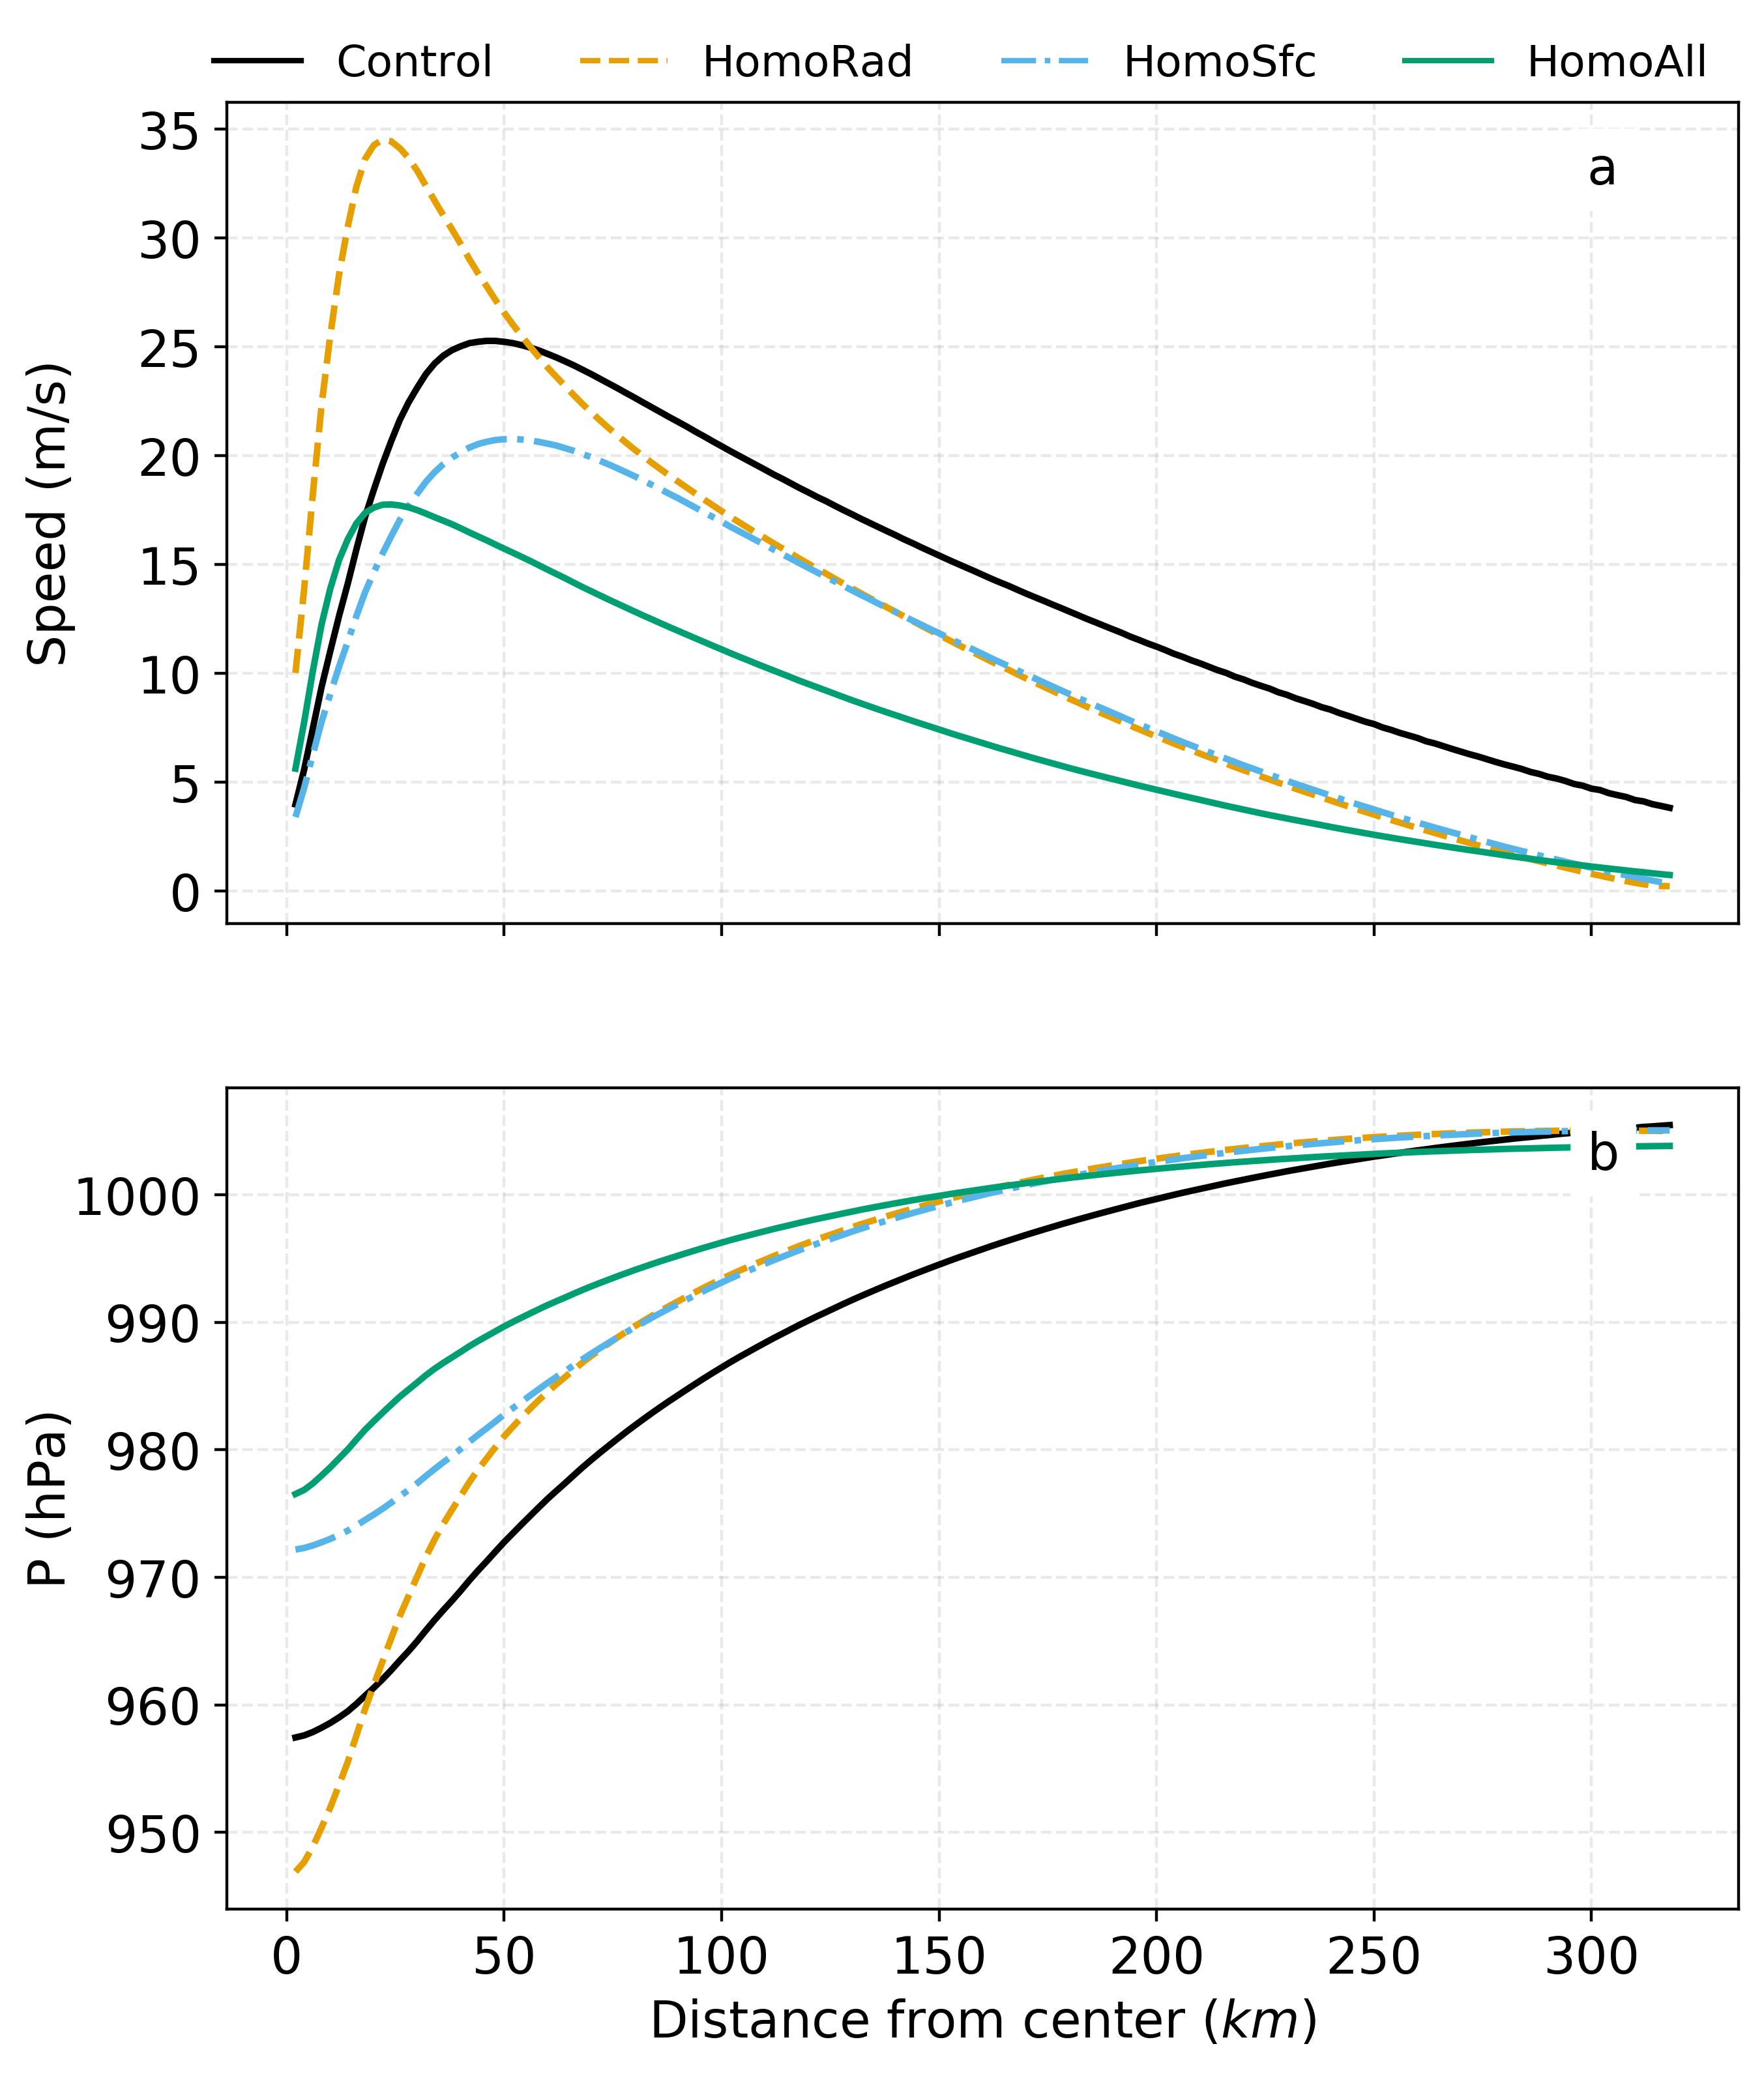

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [38]:
fig, ax = plt.subplots(2,1,sharex=true,figsize=(2*3.74,2*4.5),dpi=400)
p1 = ax[1].plot(x[x_iter],averagespeed_control[x_iter],label="Control")

p2 = ax[1].plot(x[x_iter],averagespeed_homoRad[x_iter],label="HomoRad")
p3 = ax[1].plot(x[x_iter],averagespeed_homoSfc[x_iter],label="HomoSfc")
p4 = ax[1].plot(x[x_iter],averagespeed_homoAll[x_iter],label="HomoAll")
ax[1].set_ylabel(string("Speed (m/s)"))
#######################
p1 = ax[2].plot(x[x_iter],averagepres_control[x_iter],label="Control")
p2 = ax[2].plot(x[x_iter],averagepres_homoRad[x_iter],label="HomoRad")
p3 = ax[2].plot(x[x_iter],averagepres_homoSfc[x_iter],label="HomoSfc")
p4 = ax[2].plot(x[x_iter],averagepres_homoAll[x_iter],label="HomoAll")
ax[2].set_ylabel(string("P (hPa)"))

# #######################

ax[2].set_xlabel(string("Distance from center ", L"(km)"))
ax[1].yaxis.set_label_coords(-0.1,0.5)
ax[2].yaxis.set_label_coords(-0.1,0.5)
ax[1].annotate("a", xy=(0.9, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[2].annotate("b", xy=(0.9, 0.9), xycoords="axes fraction",backgroundcolor="white")
plt.tight_layout
ax[1].legend(loc = (-0.02, 1), ncol=4 ,frameon=false,fontsize=12)
lw = 1.8
[ln.set_linewidth(lw) for i in 1:length(ax) for ln in ax[i].lines]
ax[1].grid(b=true,which="major",color="xkcd:gray", linestyle="--",alpha=0.2)
ax[2].grid(b=true,which="major",color="xkcd:gray", linestyle="--",alpha=0.2)
savefig(joinpath(output_dir,"composite_1d_azimuthal_speed.png"), bbox_inches="tight")
savefig(joinpath(output_dir,"composite_1d_azimuthal_speed.eps"), bbox_inches="tight")
savefig(joinpath(output_dir,"composite_1d_azimuthal_speed.pdf"), bbox_inches="tight")

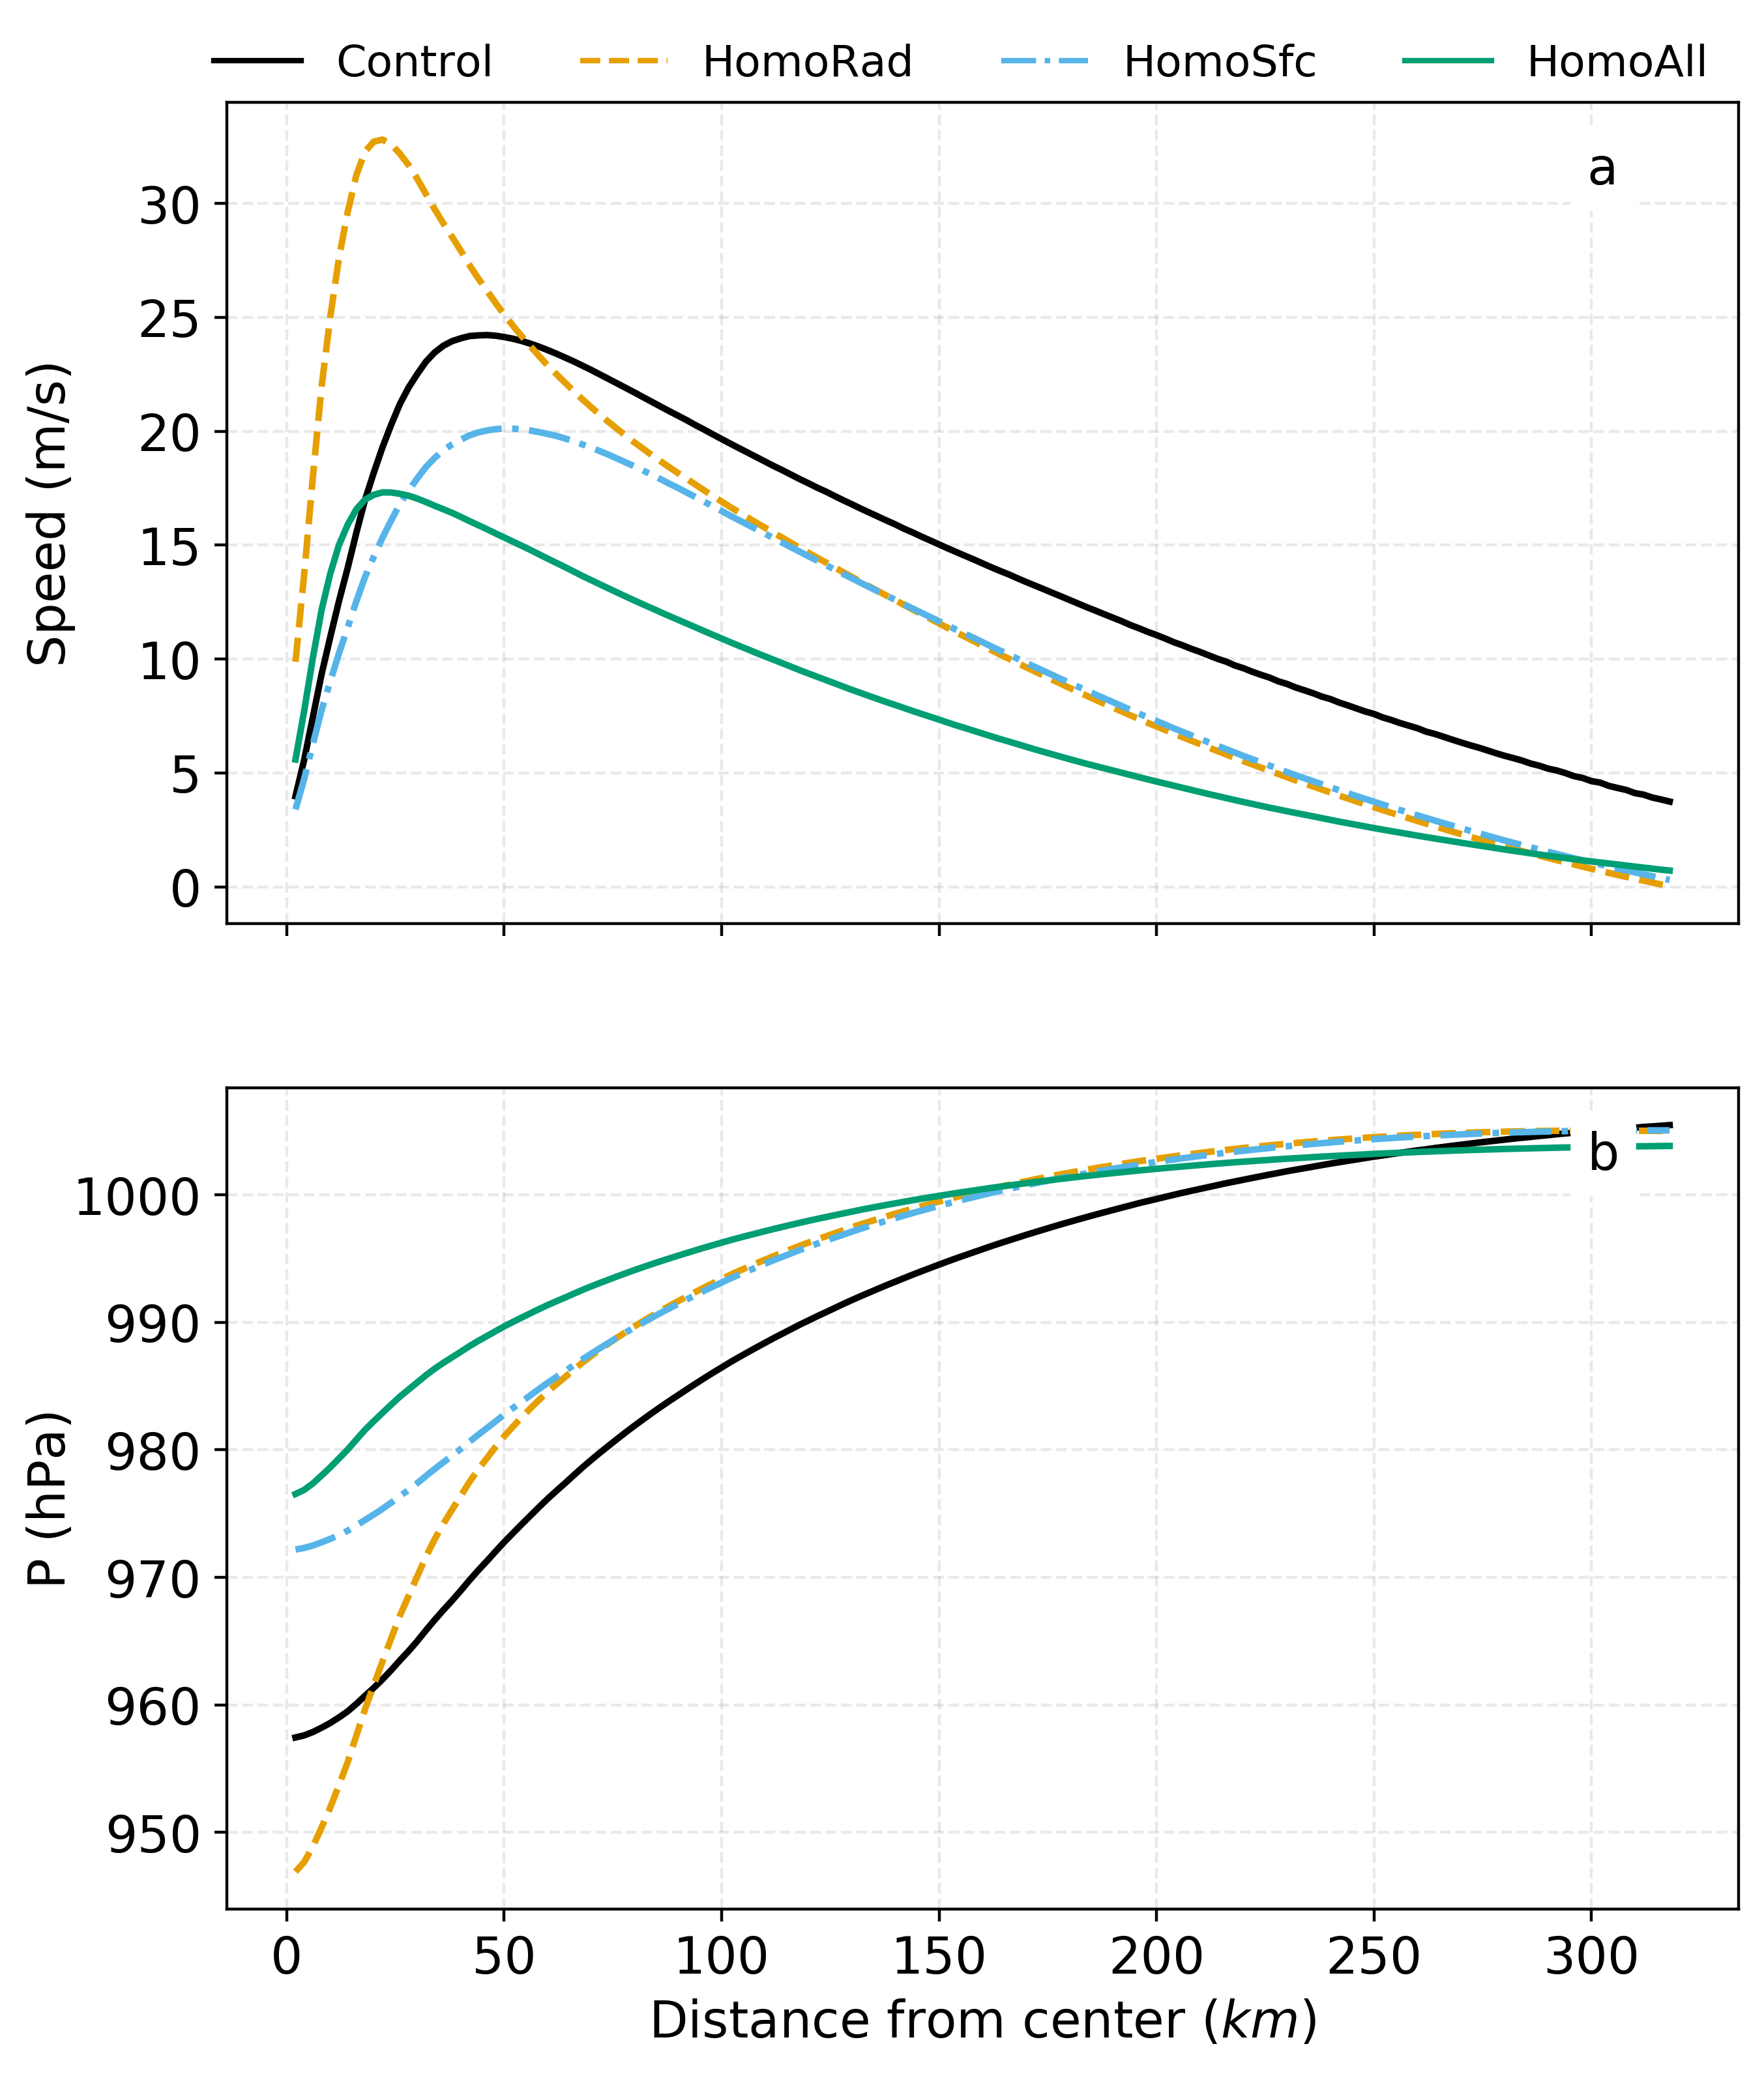

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [40]:
fig, ax = plt.subplots(2,1,sharex=true,figsize=(2*3.74,2*4.5),dpi=400)
p1 = ax[1].plot(x[x_iter],tangential_control[x_iter],label="Control")

p2 = ax[1].plot(x[x_iter],tangential_homoRad[x_iter],label="HomoRad")
p3 = ax[1].plot(x[x_iter],tangential_homoSfc[x_iter],label="HomoSfc")
p4 = ax[1].plot(x[x_iter],tangential_homoAll[x_iter],label="HomoAll")
ax[1].set_ylabel(string("Speed (m/s)"))
#######################
p1 = ax[2].plot(x[x_iter],averagepres_control[x_iter],label="Control")
p2 = ax[2].plot(x[x_iter],averagepres_homoRad[x_iter],label="HomoRad")
p3 = ax[2].plot(x[x_iter],averagepres_homoSfc[x_iter],label="HomoSfc")
p4 = ax[2].plot(x[x_iter],averagepres_homoAll[x_iter],label="HomoAll")
ax[2].set_ylabel(string("P (hPa)"))

# #######################

ax[2].set_xlabel(string("Distance from center ", L"(km)"))
ax[1].yaxis.set_label_coords(-0.1,0.5)
ax[2].yaxis.set_label_coords(-0.1,0.5)
ax[1].annotate("a", xy=(0.9, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[2].annotate("b", xy=(0.9, 0.9), xycoords="axes fraction",backgroundcolor="white")
plt.tight_layout
ax[1].legend(loc = (-0.02, 1), ncol=4 ,frameon=false,fontsize=12)
lw = 1.8
[ln.set_linewidth(lw) for i in 1:length(ax) for ln in ax[i].lines]
ax[1].grid(b=true,which="major",color="xkcd:gray", linestyle="--",alpha=0.2)
ax[2].grid(b=true,which="major",color="xkcd:gray", linestyle="--",alpha=0.2)
savefig(joinpath(output_dir,"composite_1d_azimuthal_tangential.png"), bbox_inches="tight")
savefig(joinpath(output_dir,"composite_1d_azimuthal_tangential.eps"), bbox_inches="tight")
savefig(joinpath(output_dir,"composite_1d_azimuthal_tangential.pdf"), bbox_inches="tight")

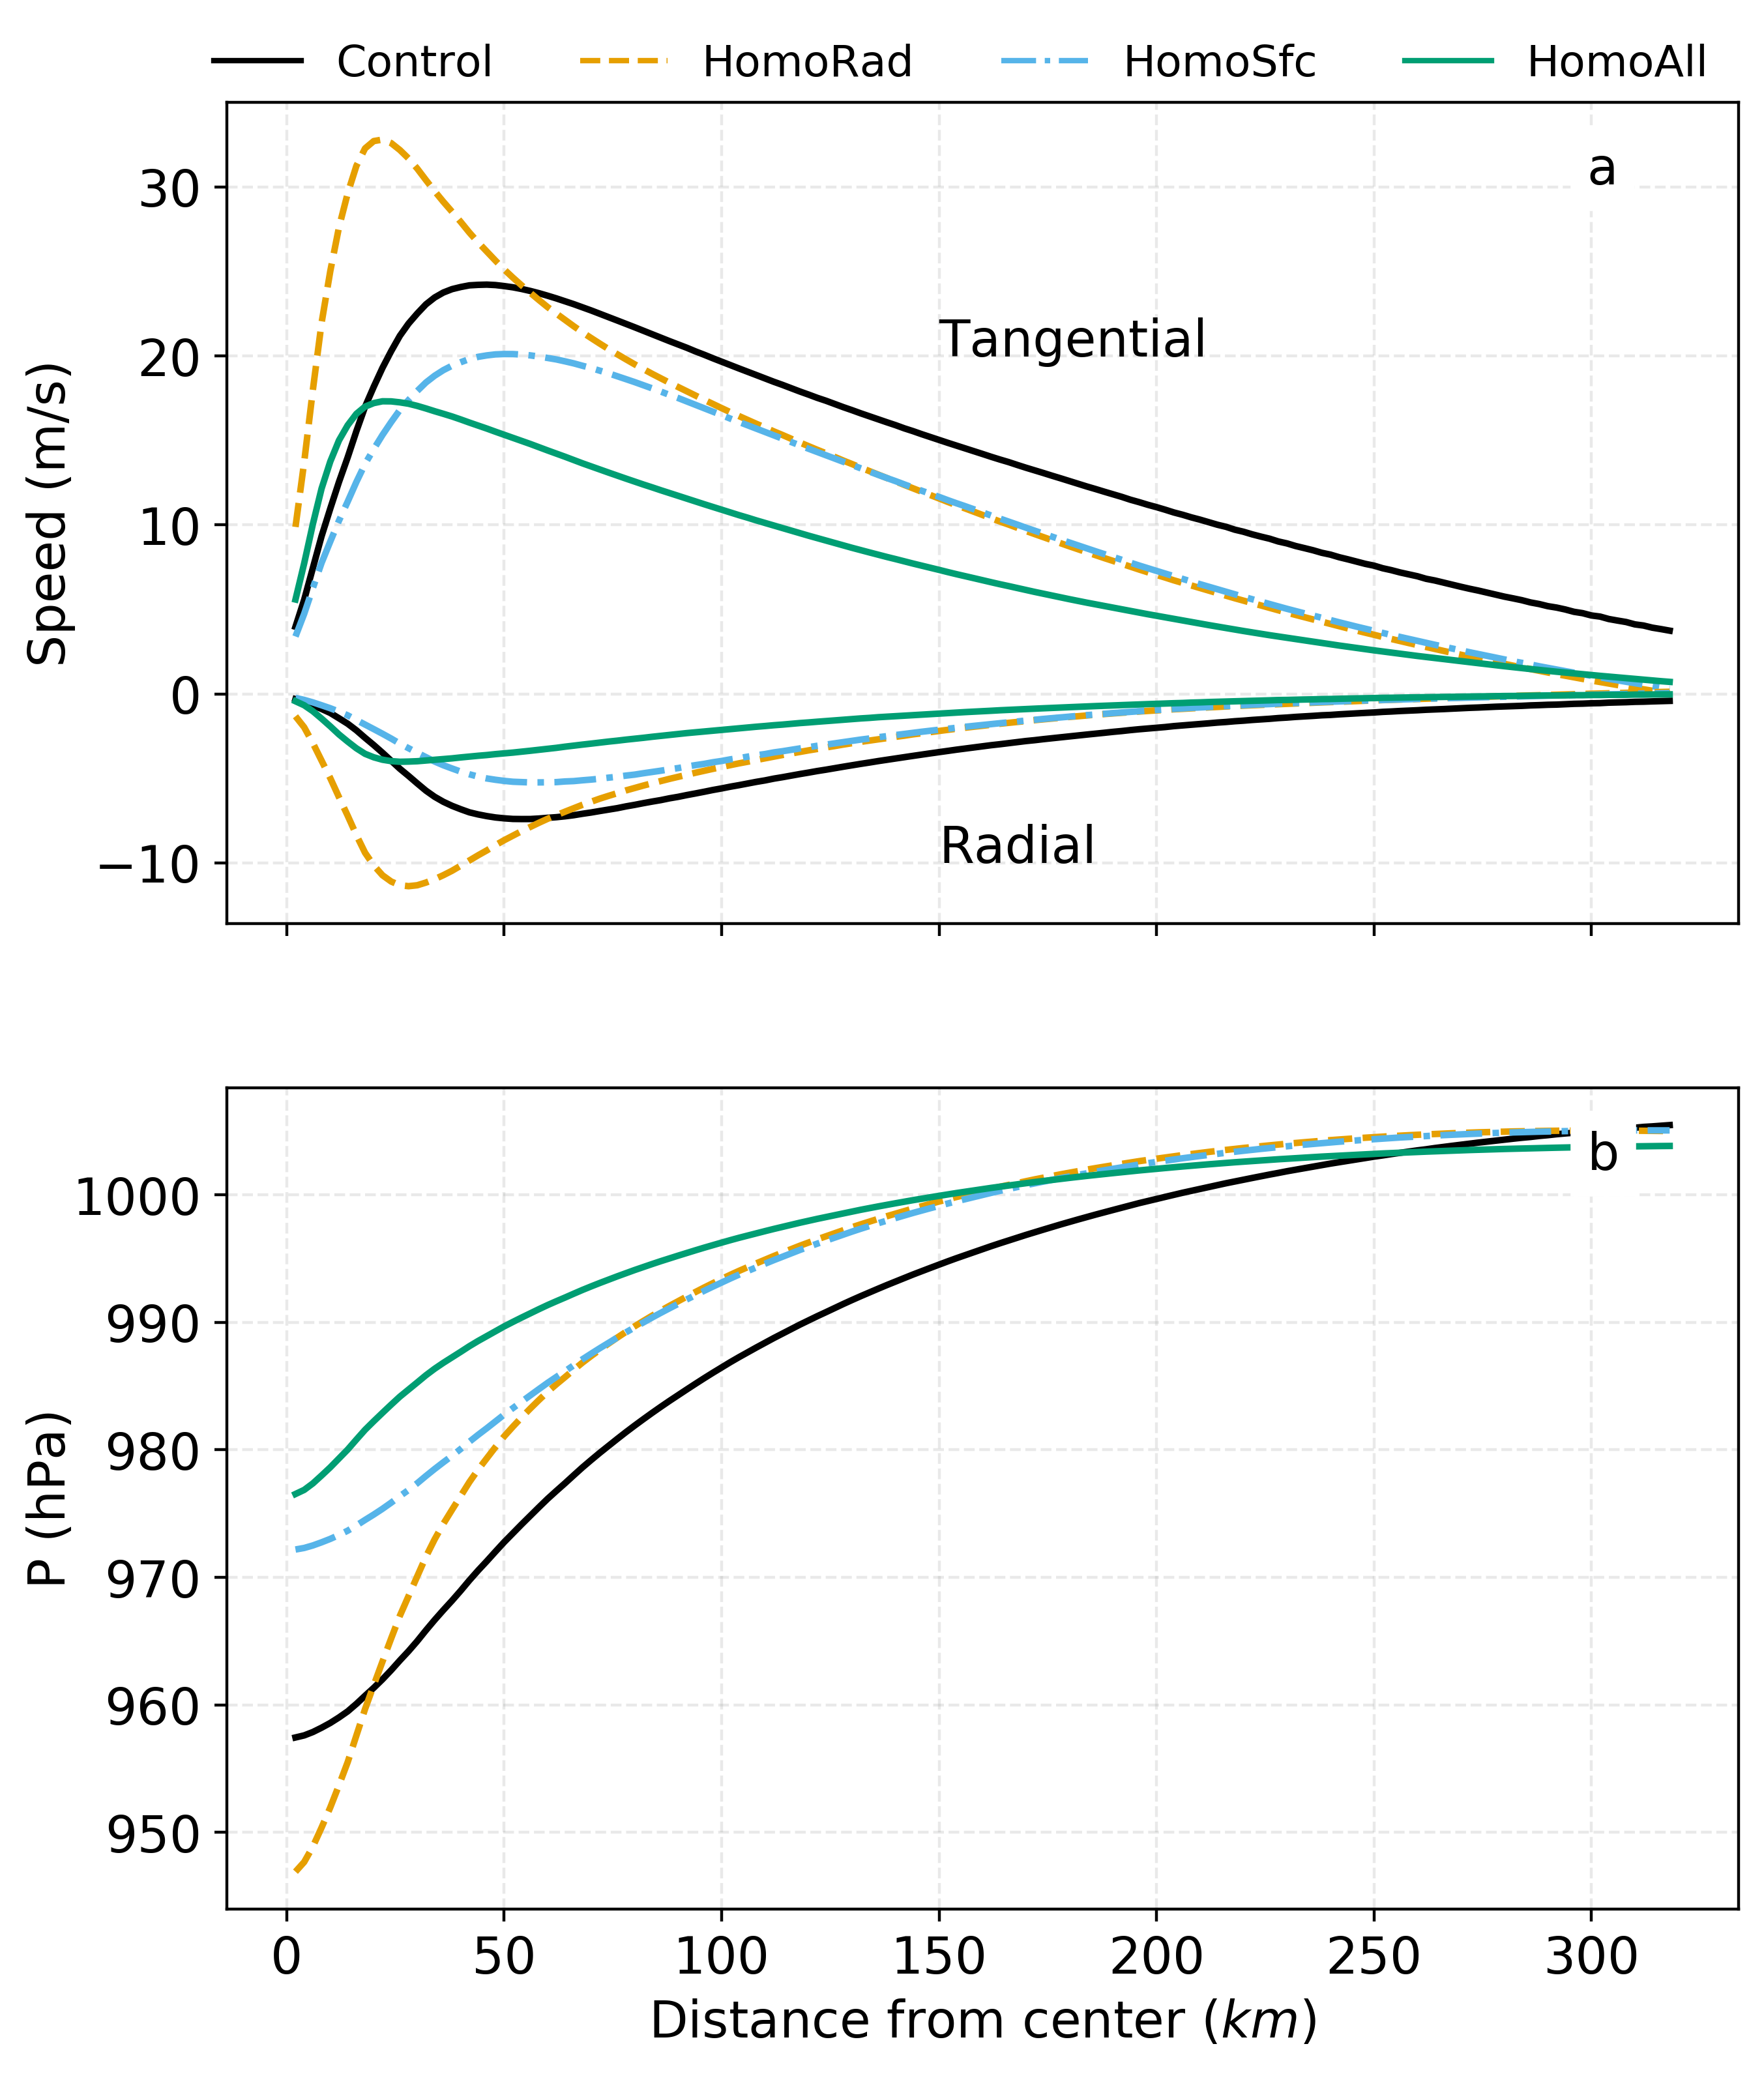

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [44]:
fig, ax = plt.subplots(2,1,sharex=true,figsize=(2*3.74,2*4.5),dpi=400)
p1 = ax[1].plot(x[x_iter],tangential_control[x_iter],label="Control")
p2 = ax[1].plot(x[x_iter],tangential_homoRad[x_iter],label="HomoRad")
p3 = ax[1].plot(x[x_iter],tangential_homoSfc[x_iter],label="HomoSfc")
p4 = ax[1].plot(x[x_iter],tangential_homoAll[x_iter],label="HomoAll")

ax[1].plot(x[x_iter],radial_control[x_iter],label="")
ax[1].plot(x[x_iter],radial_homoRad[x_iter],label="")
ax[1].plot(x[x_iter],radial_homoSfc[x_iter],label="")
ax[1].plot(x[x_iter],radial_homoAll[x_iter],label="")

ax[1].annotate("Tangential",(150,20))
ax[1].annotate("Radial",(150,-10))

ax[1].set_ylabel(string("Speed (m/s)"))
#######################
p1 = ax[2].plot(x[x_iter],averagepres_control[x_iter],label="Control")
p2 = ax[2].plot(x[x_iter],averagepres_homoRad[x_iter],label="HomoRad")
p3 = ax[2].plot(x[x_iter],averagepres_homoSfc[x_iter],label="HomoSfc")
p4 = ax[2].plot(x[x_iter],averagepres_homoAll[x_iter],label="HomoAll")
ax[2].set_ylabel(string("P (hPa)"))

# #######################

ax[2].set_xlabel(string("Distance from center ", L"(km)"))
ax[1].yaxis.set_label_coords(-0.1,0.5)
ax[2].yaxis.set_label_coords(-0.1,0.5)
ax[1].annotate("a", xy=(0.9, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[2].annotate("b", xy=(0.9, 0.9), xycoords="axes fraction",backgroundcolor="white")
plt.tight_layout
ax[1].legend(loc = (-0.02, 1), ncol=4 ,frameon=false,fontsize=12)
lw = 1.8
[ln.set_linewidth(lw) for i in 1:length(ax) for ln in ax[i].lines]
ax[1].grid(b=true,which="major",color="xkcd:gray", linestyle="--",alpha=0.2)
ax[2].grid(b=true,which="major",color="xkcd:gray", linestyle="--",alpha=0.2)
savefig(joinpath(output_dir,"composite_1d_azimuthal_both.png"), bbox_inches="tight")
savefig(joinpath(output_dir,"composite_1d_azimuthal_both.eps"), bbox_inches="tight")
savefig(joinpath(output_dir,"composite_1d_azimuthal_both.pdf"), bbox_inches="tight")

In [28]:
p1[1]

PyObject <matplotlib.lines.Line2D object at 0x2aac22ce1e10>

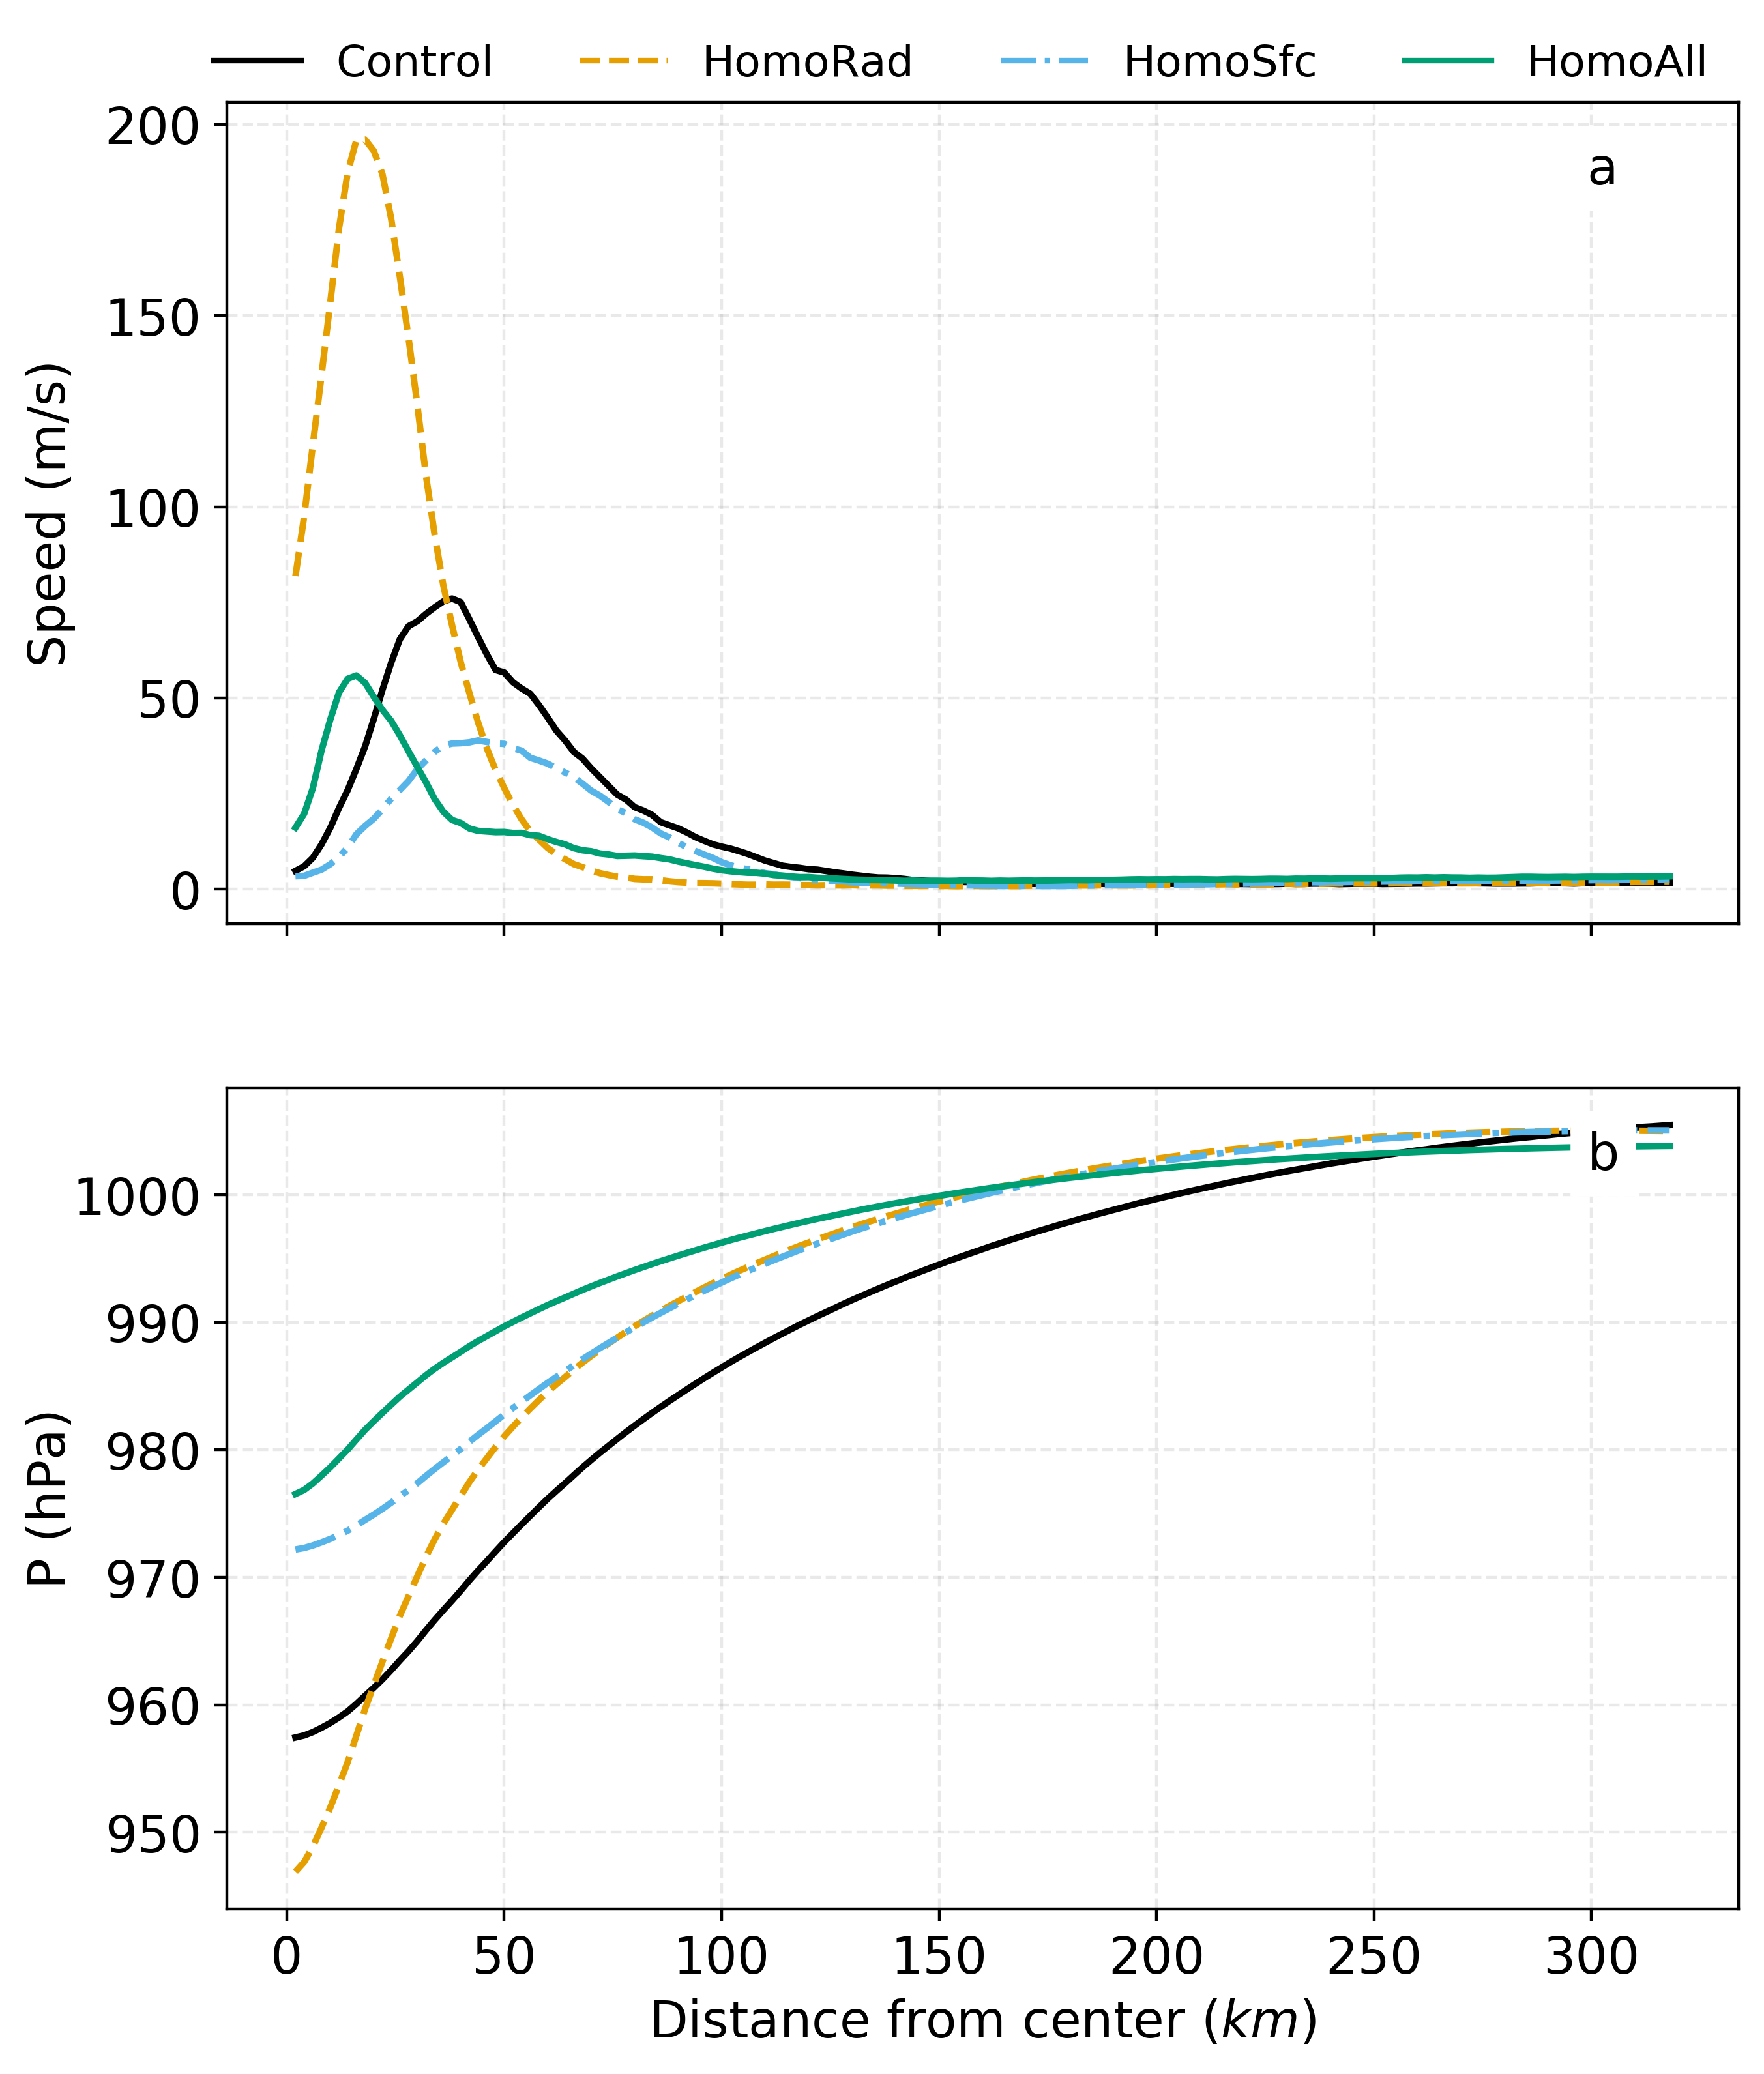

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [18]:
fig, ax = plt.subplots(2,1,sharex=true,figsize=(2*3.74,2*4.5),dpi=400)
p1 = ax[1].plot(x[x_iter],precip_control[x_iter],label="Control")

p2 = ax[1].plot(x[x_iter],precip_homoRad[x_iter],label="HomoRad")
p3 = ax[1].plot(x[x_iter],precip_homoSfc[x_iter],label="HomoSfc")
p4 = ax[1].plot(x[x_iter],precip_homoAll[x_iter],label="HomoAll")
ax[1].set_ylabel(string("Speed (m/s)"))
#######################
p1 = ax[2].plot(x[x_iter],averagepres_control[x_iter],label="Control")
p2 = ax[2].plot(x[x_iter],averagepres_homoRad[x_iter],label="HomoRad")
p3 = ax[2].plot(x[x_iter],averagepres_homoSfc[x_iter],label="HomoSfc")
p4 = ax[2].plot(x[x_iter],averagepres_homoAll[x_iter],label="HomoAll")
ax[2].set_ylabel(string("P (hPa)"))

# #######################

ax[2].set_xlabel(string("Distance from center ", L"(km)"))
ax[1].yaxis.set_label_coords(-0.1,0.5)
ax[2].yaxis.set_label_coords(-0.1,0.5)
ax[1].annotate("a", xy=(0.9, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[2].annotate("b", xy=(0.9, 0.9), xycoords="axes fraction",backgroundcolor="white")
plt.tight_layout
ax[1].legend(loc = (-0.02, 1), ncol=4 ,frameon=false,fontsize=12)
lw = 1.8
[ln.set_linewidth(lw) for i in 1:length(ax) for ln in ax[i].lines]
ax[1].grid(b=true,which="major",color="xkcd:gray", linestyle="--",alpha=0.2)
ax[2].grid(b=true,which="major",color="xkcd:gray", linestyle="--",alpha=0.2)
savefig(joinpath(output_dir,"composite_1d_precip_pressure.png"), bbox_inches="tight")
savefig(joinpath(output_dir,"composite_1d_precip_pressure.eps"), bbox_inches="tight")
savefig(joinpath(output_dir,"composite_1d_precip_pressure.pdf"), bbox_inches="tight")